In [1]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [2]:
#setting direktory
import os
os.getcwd()
os.chdir('d:\\APP\\python\\sa\\')
os.getcwd()

'd:\\APP\\python\\sa'

In [3]:
#read data
df = pd.read_csv('datasetEvadosenR2.csv',sep=';')
df.head()

,komentar,sentiment
0,Mampu memahami dan mengetahui beberapa materi ...,positif
1,Dalam menerangkan pelajaran cukup baik dan mud...,positif
2,"Lebih nyaman, rilex, tidak tegang, tidak merep...",positif
3,Menurut saya pribadi yaitu penjelasan yang san...,positif
4,Dalam perkuliahan ini yg menjadi kelebihan uta...,positif


In [4]:
#normalisasi (kustumize)
norm = {" dgn " : " dengan ", " yg ": " yang ", " tdk ":" tidak ", "bgmn ":" bagaimana ", ' tdk':' tidak ', ' blum ':' belum ', 'mantaaaaaaaappp':' bagus ', ' josss ':' bagus ', ' thanks ': ' terima kasih ', 'fast':' cepat ', ' dg ':' dengan ', 'trims':' terima kasih ', 'brg':' barang ', 'gx':' tidak ', ' dgn ':' dengan ', ' recommended':' rekomen ', 'recomend':' rekomen ', 'good':' bagus '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['n_komentar'] = df['komentar'].apply(lambda x: normalisasi(x))
df.head()

,komentar,sentiment,n_komentar
0,Mampu memahami dan mengetahui beberapa materi ...,positif,Mampu memahami dan mengetahui beberapa materi ...
1,Dalam menerangkan pelajaran cukup baik dan mud...,positif,Dalam menerangkan pelajaran cukup baik dan mud...
2,"Lebih nyaman, rilex, tidak tegang, tidak merep...",positif,"Lebih nyaman, rilex, tidak tegang, tidak merep..."
3,Menurut saya pribadi yaitu penjelasan yang san...,positif,Menurut saya pribadi yaitu penjelasan yang san...
4,Dalam perkuliahan ini yg menjadi kelebihan uta...,positif,Dalam perkuliahan ini yang menjadi kelebihan u...


In [5]:
##lowecase, remove teks
import string
import re

def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['lw_komentar'] = df['n_komentar'].apply(lambda x: clean_text(x))
#df['label'] = df['sentiment']
#df[['komentar','lw_komentar','sentiment',]].head()
df.head()


,komentar,sentiment,n_komentar,lw_komentar
0,Mampu memahami dan mengetahui beberapa materi ...,positif,Mampu memahami dan mengetahui beberapa materi ...,mampu memahami dan mengetahui beberapa materi ...
1,Dalam menerangkan pelajaran cukup baik dan mud...,positif,Dalam menerangkan pelajaran cukup baik dan mud...,dalam menerangkan pelajaran cukup baik dan mud...
2,"Lebih nyaman, rilex, tidak tegang, tidak merep...",positif,"Lebih nyaman, rilex, tidak tegang, tidak merep...",lebih nyaman rilex tidak tegang tidak merep...
3,Menurut saya pribadi yaitu penjelasan yang san...,positif,Menurut saya pribadi yaitu penjelasan yang san...,menurut saya pribadi yaitu penjelasan yang san...
4,Dalam perkuliahan ini yg menjadi kelebihan uta...,positif,Dalam perkuliahan ini yang menjadi kelebihan u...,dalam perkuliahan ini yang menjadi kelebihan u...


In [6]:
import nltk
from nltk.corpus import stopwords

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

custom_stopwords = ["hrm"]

stopwords_indonesia = set(stopwords.words('indonesian'))
stopwords_indonesia.update(custom_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\herym\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
##stop word

# Fungsi untuk membersihkan teks dari stopword
def bersihkan_teks_dari_stopword(teks):
    kata_kunci = teks.split()  # Memisahkan kata-kata dalam teks
    kata_kunci_bersih = [kata for kata in kata_kunci if kata.lower() not in stopwords_indonesia]
    teks_bersih = ' '.join(kata_kunci_bersih)
    return teks_bersih

df['sw_komentar'] = df['lw_komentar'].apply(bersihkan_teks_dari_stopword)

df.head()

,komentar,sentiment,n_komentar,lw_komentar,sw_komentar
0,Mampu memahami dan mengetahui beberapa materi ...,positif,Mampu memahami dan mengetahui beberapa materi ...,mampu memahami dan mengetahui beberapa materi ...,memahami materi ilmu perkuliahan
1,Dalam menerangkan pelajaran cukup baik dan mud...,positif,Dalam menerangkan pelajaran cukup baik dan mud...,dalam menerangkan pelajaran cukup baik dan mud...,menerangkan pelajaran mudah dipahami
2,"Lebih nyaman, rilex, tidak tegang, tidak merep...",positif,"Lebih nyaman, rilex, tidak tegang, tidak merep...",lebih nyaman rilex tidak tegang tidak merep...,nyaman rilex tegang merepresentasikan kuliah m...
3,Menurut saya pribadi yaitu penjelasan yang san...,positif,Menurut saya pribadi yaitu penjelasan yang san...,menurut saya pribadi yaitu penjelasan yang san...,pribadi penjelasan detail mahasiswa paham
4,Dalam perkuliahan ini yg menjadi kelebihan uta...,positif,Dalam perkuliahan ini yang menjadi kelebihan u...,dalam perkuliahan ini yang menjadi kelebihan u...,perkuliahan kelebihan utama teori penjelasan l...


In [8]:
#token
df['to_komentar'] = df['sw_komentar'].apply(lambda x:x.split())
df.head()

,komentar,sentiment,n_komentar,lw_komentar,sw_komentar,to_komentar
0,Mampu memahami dan mengetahui beberapa materi ...,positif,Mampu memahami dan mengetahui beberapa materi ...,mampu memahami dan mengetahui beberapa materi ...,memahami materi ilmu perkuliahan,"[memahami, materi, ilmu, perkuliahan]"
1,Dalam menerangkan pelajaran cukup baik dan mud...,positif,Dalam menerangkan pelajaran cukup baik dan mud...,dalam menerangkan pelajaran cukup baik dan mud...,menerangkan pelajaran mudah dipahami,"[menerangkan, pelajaran, mudah, dipahami]"
2,"Lebih nyaman, rilex, tidak tegang, tidak merep...",positif,"Lebih nyaman, rilex, tidak tegang, tidak merep...",lebih nyaman rilex tidak tegang tidak merep...,nyaman rilex tegang merepresentasikan kuliah m...,"[nyaman, rilex, tegang, merepresentasikan, kul..."
3,Menurut saya pribadi yaitu penjelasan yang san...,positif,Menurut saya pribadi yaitu penjelasan yang san...,menurut saya pribadi yaitu penjelasan yang san...,pribadi penjelasan detail mahasiswa paham,"[pribadi, penjelasan, detail, mahasiswa, paham]"
4,Dalam perkuliahan ini yg menjadi kelebihan uta...,positif,Dalam perkuliahan ini yang menjadi kelebihan u...,dalam perkuliahan ini yang menjadi kelebihan u...,perkuliahan kelebihan utama teori penjelasan l...,"[perkuliahan, kelebihan, utama, teori, penjela..."


In [9]:
#stemming

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return stemmer.stem(text)

df['st_komentar'] = df['sw_komentar'].apply(stem_text)
df.head()

,komentar,sentiment,n_komentar,lw_komentar,sw_komentar,to_komentar,st_komentar
0,Mampu memahami dan mengetahui beberapa materi ...,positif,Mampu memahami dan mengetahui beberapa materi ...,mampu memahami dan mengetahui beberapa materi ...,memahami materi ilmu perkuliahan,"[memahami, materi, ilmu, perkuliahan]",paham materi ilmu kuliah
1,Dalam menerangkan pelajaran cukup baik dan mud...,positif,Dalam menerangkan pelajaran cukup baik dan mud...,dalam menerangkan pelajaran cukup baik dan mud...,menerangkan pelajaran mudah dipahami,"[menerangkan, pelajaran, mudah, dipahami]",terang ajar mudah paham
2,"Lebih nyaman, rilex, tidak tegang, tidak merep...",positif,"Lebih nyaman, rilex, tidak tegang, tidak merep...",lebih nyaman rilex tidak tegang tidak merep...,nyaman rilex tegang merepresentasikan kuliah m...,"[nyaman, rilex, tegang, merepresentasikan, kul...",nyaman rilex tegang representasi kuliah monoto...
3,Menurut saya pribadi yaitu penjelasan yang san...,positif,Menurut saya pribadi yaitu penjelasan yang san...,menurut saya pribadi yaitu penjelasan yang san...,pribadi penjelasan detail mahasiswa paham,"[pribadi, penjelasan, detail, mahasiswa, paham]",pribadi jelas detail mahasiswa paham
4,Dalam perkuliahan ini yg menjadi kelebihan uta...,positif,Dalam perkuliahan ini yang menjadi kelebihan u...,dalam perkuliahan ini yang menjadi kelebihan u...,perkuliahan kelebihan utama teori penjelasan l...,"[perkuliahan, kelebihan, utama, teori, penjela...",kuliah lebih utama teori jelas langsung prakte...


In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [11]:
positif = df[df['sentiment']=='positif']
negatif = df[df['sentiment']=='negatif']

kpositif = positif['st_komentar']
knegatif = negatif['st_komentar']

knegatif

allkpositif = " ".join(kpositif.dropna())
allknegatif = " ".join(knegatif.dropna())



In [27]:
positif.describe()

,komentar,sentiment,n_komentar,lw_komentar,sw_komentar,to_komentar,st_komentar
count,839,839,839,839,839,839,839
unique,838,1,838,836,814,814,813
top,Cukup memadai,positif,Cukup memadai,cukup memadai,,[],
freq,2,839,2,2,11,11,11


In [28]:
negatif.describe()

,komentar,sentiment,n_komentar,lw_komentar,sw_komentar,to_komentar,st_komentar
count,415,415,415,415,415,415,415
unique,415,1,415,415,414,414,414
top,Sebetulnya kelebihan pada matkul teorinya suda...,negatif,Sebetulnya kelebihan pada matkul teorinya suda...,sebetulnya kelebihan pada matkul teorinya suda...,jam kosong,"[jam, kosong]",jam kosong
freq,1,415,1,1,2,2,2


In [29]:
839+415

1254

sentiment
positif    839
negatif    415
Name: count, dtype: int64


C:\Users\herym\AppData\Local\Temp\ipykernel_844\1592417853.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sd = pd.value_counts(df['sentiment'], sort='True')


<function matplotlib.pyplot.show(close=None, block=None)>

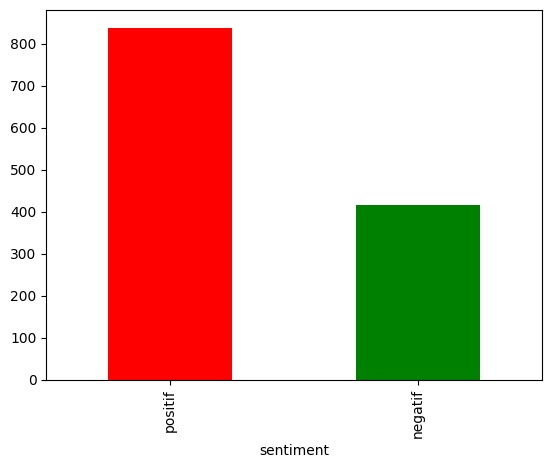

In [12]:
sd = pd.value_counts(df['sentiment'], sort='True')
print(sd)
sd.plot(kind='bar',color=['red','green'])
plt.show

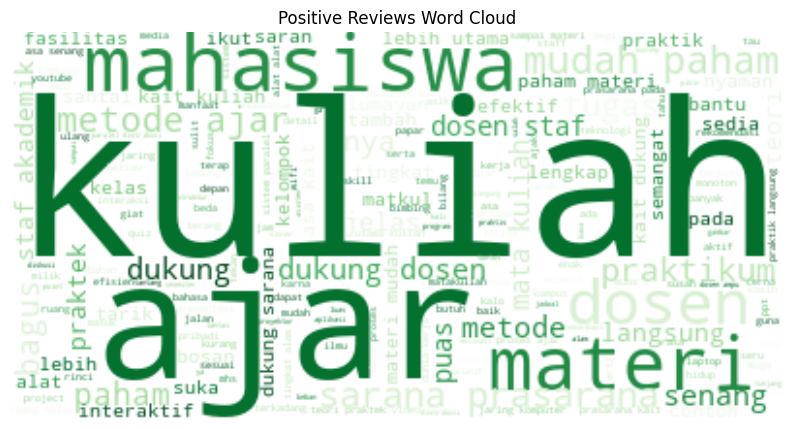

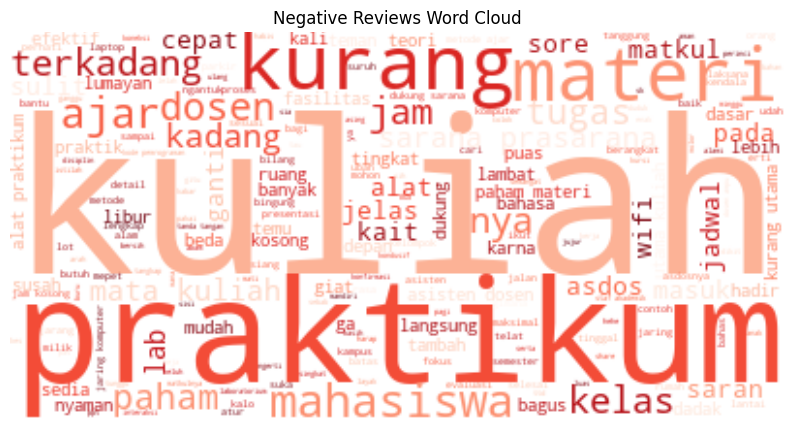

In [13]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(allkpositif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()


wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(allknegatif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()


In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
clean_komentar = df['st_komentar']
clean_komentar.isnull().sum()

0

In [15]:
cv = CountVectorizer()
term_fit = cv.fit(clean_komentar)
print(len(term_fit.vocabulary_))

1321


In [16]:
term_fit.vocabulary_

{'paham': 821,
 'materi': 686,
 'ilmu': 413,
 'kuliah': 576,
 'terang': 1193,
 'ajar': 22,
 'mudah': 751,
 'nyaman': 795,
 'rilex': 974,
 'tegang': 1176,
 'representasi': 970,
 'monoton': 742,
 'semangat': 1043,
 'happy': 391,
 'ngantuk': 773,
 'pribadi': 920,
 'jelas': 465,
 'detail': 253,
 'mahasiswa': 651,
 'lebih': 615,
 'utama': 1281,
 'teori': 1191,
 'langsung': 595,
 'praktek': 900,
 'jado': 444,
 'tpi': 1234,
 'dosen': 288,
 'friendly': 339,
 'duniawi': 297,
 'that': 1208,
 'was': 1300,
 'great': 376,
 'nya': 793,
 'sekolah': 1037,
 'enak': 313,
 'praktikum': 905,
 'tugas': 1248,
 'mata': 683,
 'cepat': 200,
 'puas': 936,
 'quiz': 942,
 'dada': 224,
 'tantang': 1168,
 'jadi': 443,
 'semester': 1045,
 'secrara': 1029,
 'ppt': 898,
 'poin': 887,
 'iyaa': 441,
 'giat': 366,
 'kelompok': 505,
 'dn': 286,
 'bantu': 105,
 'kalo': 484,
 'selesai': 1041,
 'bab': 85,
 'temu': 1189,
 'batas': 115,
 'mampu': 666,
 'laksana': 587,
 'interaktif': 428,
 'metode': 716,
 'bosan': 168,
 'hasil'

In [17]:
term_frequency_all = term_fit.transform(clean_komentar)
print(term_frequency_all)

  (0, 413)	1
  (0, 576)	1
  (0, 686)	1
  (0, 821)	1
  (1, 22)	1
  (1, 751)	1
  (1, 821)	1
  (1, 1193)	1
  (2, 391)	1
  (2, 576)	1
  (2, 742)	1
  (2, 773)	1
  (2, 795)	1
  (2, 970)	1
  (2, 974)	1
  (2, 1043)	1
  (2, 1176)	1
  (3, 253)	1
  (3, 465)	1
  (3, 651)	1
  (3, 821)	1
  (3, 920)	1
  (4, 444)	1
  (4, 465)	1
  (4, 576)	1
  :	:
  (1250, 1015)	1
  (1250, 1032)	1
  (1250, 1222)	1
  (1251, 106)	1
  (1251, 325)	2
  (1251, 576)	1
  (1251, 651)	1
  (1251, 724)	1
  (1251, 1014)	1
  (1252, 252)	1
  (1252, 294)	1
  (1252, 332)	1
  (1252, 449)	1
  (1252, 576)	1
  (1252, 594)	1
  (1252, 738)	1
  (1253, 95)	1
  (1253, 288)	2
  (1253, 576)	2
  (1253, 651)	1
  (1253, 686)	1
  (1253, 690)	1
  (1253, 793)	1
  (1253, 821)	2
  (1253, 1248)	1


In [18]:
komentar_tf = clean_komentar[1]
komentar_tf

'terang ajar mudah paham'

In [19]:
term_frequency = term_fit.transform([komentar_tf])
print(term_frequency)

  (0, 22)	1
  (0, 751)	1
  (0, 821)	1
  (0, 1193)	1


In [20]:
dokumen = term_fit.transform(clean_komentar)
tfidf_tranformer =  TfidfTransformer().fit(dokumen)
print(tfidf_tranformer.idf_)

tfidf = tfidf_tranformer.transform(term_frequency)
print(tfidf)

[7.44174367 7.44174367 7.03627856 ... 6.34313138 7.44174367 7.44174367]
  (0, 1193)	0.757927301182305
  (0, 821)	0.36176863886969435
  (0, 751)	0.4362573234046708
  (0, 22)	0.3230312768582459


In [21]:
df['st_komentar'] = df['st_komentar'].fillna("tidak ada komentar")

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (df['sw_komentar'], df['sentiment'], test_size=0.1, 
                                                     stratify=df['sentiment'], random_state=30 )


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vc = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [24]:
import numpy as np

In [25]:
print(X_train)

666     perasaan terkait dukungan dosen staf akademik ...
619     matkul dosen materi materi rinci mahasiswa bin...
1171    saran perkuliahan kerja kelompok mahasiswa mud...
496              bagus menunjang pemahaman terkait materi
44      pembelajaran medianya interaktif praktek langs...
                              ...                        
370     kekurangan perkuliahan puas terkadang materi d...
357     materi kompleks rumit pertemuan kosong durasi ...
1067    saran terkait perkuliahan kedepannya perkuliah...
1206    saran rekomendasi meningkatkan pengalaman perk...
229     perkuliahan teori nyaman kekurangannya materi ...
Name: sw_komentar, Length: 1128, dtype: object


In [ ]:
X_train = vc.fit_transform(X_train)
X_test = vc.transform(X_test)

print(X_train.shape)
print(X_test.shape)

In [ ]:
X_train = X_train.toarray()

In [ ]:
X_test = X_test.toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

param_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb,
                        param_grid=param_NB,
                        cv=cv_method,
                        verbose=1,
                        scoring='accuracy')
gscv_nb.fit(X_train, y_train)
gscv_nb.best_params_

In [ ]:
nb = GaussianNB(var_smoothing=0.8111308307896871)
nb.fit(X_train, y_train)

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay

In [ ]:
print(confusion_matrix(y_test,y_pred_nb))
print(classification_report(y_test, y_pred_nb))

In [1]:
RocCurveDisplay.from_estimator(nb, X_test, y_test)

NameError: name 'RocCurveDisplay' is not defined